In [2]:
import os
import nibabel as nib
from nibabel.testing import data_path
import matplotlib
from matplotlib import pyplot as plt
from nilearn import plotting, image
from nilearn.image import mean_img
import numpy as np

from functions import sum_3D_array, normalize_array, create_volume, naive_sanity_check, show_3D_array, view_sagittal_slices, view_middle_slice, parent_directory

In [7]:
# link to fMRI scan
input_fmri_file = "/Users/joachimpfefferkorn/Documents/mri_data/To_Share/T1w_Space/filtreg_sm_dspk_sk_sub-AG5_ses-baseline_task-Newresting1HB6scan_space-T1w_desc-preproc_bold.nii"

In [8]:
andrew_brain_filename = os.path.join(data_path, input_fmri_file)
andrew_brain_img = nib.load(andrew_brain_filename) #why is this a join?

In [9]:

andrew_brain_data = andrew_brain_img.get_fdata()
normalized_brain_array = normalize_array(andrew_brain_data)

In [10]:
normalized_brain_vol = create_volume(normalized_brain_array)

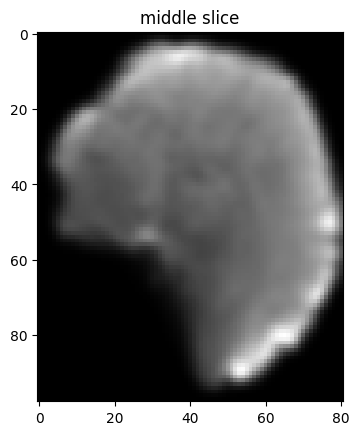

In [11]:
# TODO you need to get the BOLD out of


time_index = normalized_brain_vol[:,:,:,200]

slice = time_index[:][:][50] #hard coded for now

plt.imshow(slice, cmap="gray")
plt.title("middle slice")
plt.show()

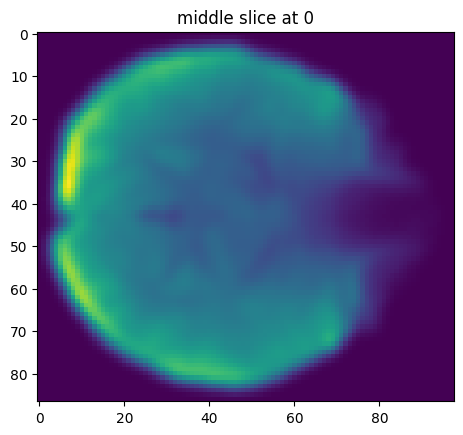

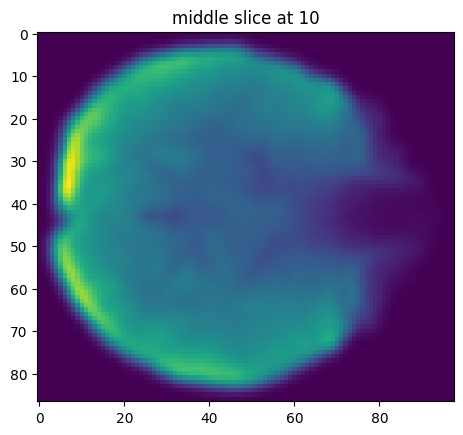

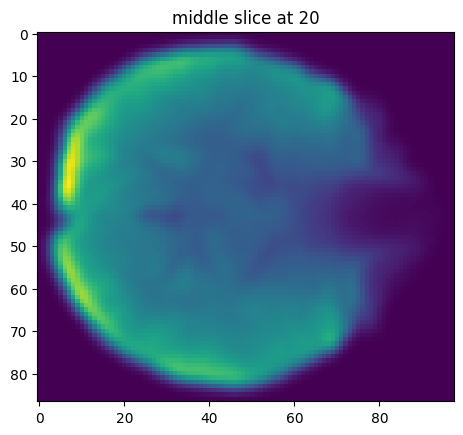

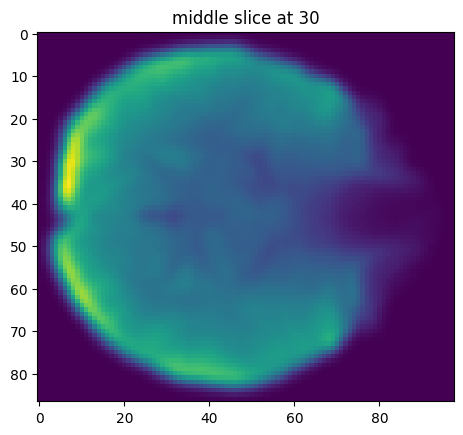

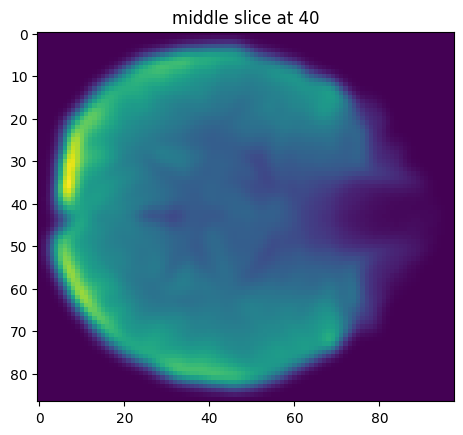

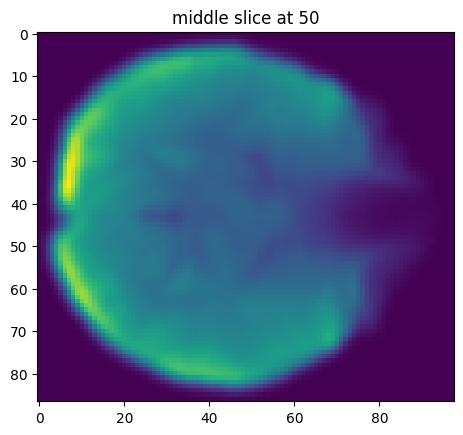

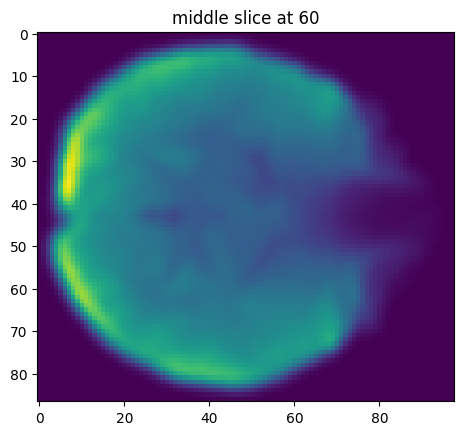

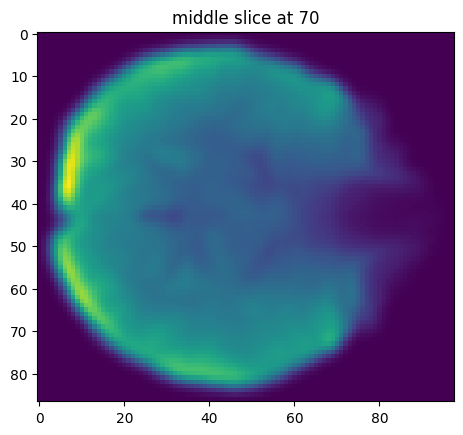

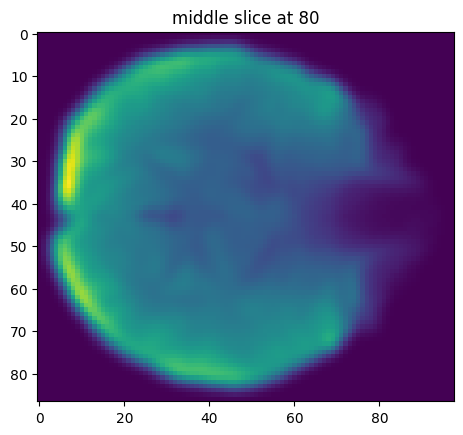

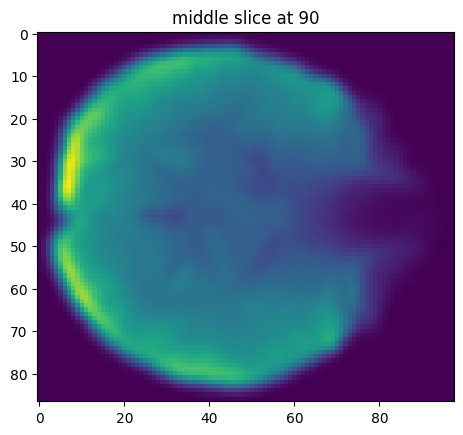

In [12]:
#loop through every 40th timeslice (as you've got 400 of them) and plot it
#print(normalized_brain_vol[3])
for time, value in enumerate(normalized_brain_vol[3]):
    #print(time)
    if time%10 == 0:
        #print(time)
        #print(value)
        slice = normalized_brain_vol[:,:,:,time]
        middle_slice = slice[:,:, slice.shape[2]//2]
        plt.imshow(middle_slice, cmap="viridis")
        plt.title(f"middle slice at {time}")
        plt.show()

# Comparing to a Base
These results won't be meaningful, but they might be a good MVP of your volume renderer.
Instead of comparing to a control condition, let's just compare to the first 3D volume in the series.
Later you can compare this to something more meaningful.

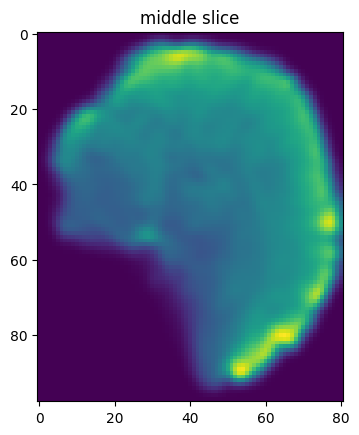

In [13]:
#pulling out the base:

control_test_3D = normalized_brain_vol[:,:,:,0]

#viewing a slice
base_slice = time_index[:][:][50] #hard coded for now
plt.imshow(base_slice, cmap="viridis")
plt.title("middle slice")
plt.show()

In [16]:
output_folder = "/Users/joachimpfefferkorn/repos/neurovolume/output/npy_seq"

In [20]:
# MVP/Testing CAVEATS (READ BEFORE USING!:
# Not applicable to any kind of meaningful analysis
# only tests against a single, 3D slice as the control.
# Difference is calculated as ABSOLUTE as I don't know how VDBs handle negative numbers
# This probably will have to be a seperate variable:
#   As in, there is the unsigned density (0-1) and then some kind of signed float that represents the activation

# lots of possible x/y/z/row/col gore but hopefully that just results in mirroring of final output.

def create_4D_volume_MVP(experimental_4D, control_3D_test_variant):
    fmri_volume = np.zeros(experimental_4D.shape)
    for time_index in range(experimental_4D.shape[3]):
        for z_index in range(experimental_4D.shape[2]):
            for y_index in range(experimental_4D.shape[1]):
                for x_index in range(experimental_4D.shape[0]): 
                    density = np.absolute(fmri_volume[x_index, y_index, z_index, time_index] - control_3D_test_variant[x_index,y_index,z_index])
                    fmri_volume[x_index,y_index,z_index,time_index] = density
                    #print(f"time: {time}, pos: {x_index},{y_index},{z_index}, density: {density}")
        vol_frame = "{:03d}".format(time_index)
        np.save(f"{output_folder}/fmri_{vol_frame}.npy", fmri_volume[:,:,:,time_index])
        print(f"saved {vol_frame}")

In [21]:
create_4D_volume_MVP(normalized_brain_vol, normalized_brain_vol[:,:,:,0])

saved 000
saved 001
saved 002
saved 003
saved 004
saved 005
saved 006
saved 007
saved 008
saved 009
saved 010
saved 011
saved 012
saved 013
saved 014
saved 015
saved 016
saved 017
saved 018
saved 019
saved 020
saved 021
saved 022
saved 023
saved 024
saved 025
saved 026
saved 027
saved 028
saved 029
saved 030
saved 031
saved 032
saved 033
saved 034
saved 035
saved 036
saved 037
saved 038
saved 039
saved 040
saved 041
saved 042
saved 043
saved 044
saved 045
saved 046
saved 047
saved 048
saved 049
saved 050
saved 051
saved 052
saved 053
saved 054
saved 055
saved 056
saved 057
saved 058
saved 059
saved 060
saved 061
saved 062
saved 063
saved 064
saved 065
saved 066
saved 067
saved 068
saved 069
saved 070
saved 071
saved 072
saved 073
saved 074
saved 075
saved 076
saved 077
saved 078
saved 079
saved 080
saved 081
saved 082
saved 083
saved 084
saved 085
saved 086
saved 087
saved 088
saved 089
saved 090
saved 091
saved 092
saved 093
saved 094
saved 095
saved 096
saved 097
saved 098
saved 099


In [ ]:
#probably also need the anatomy to overlay?